In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
pwd

'/home/wsuser/work'

In [12]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LiswI0fZyxc6OvuPYiyKIReDkFTZ9v5oEN6KwEiP3aGu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionanalyzer-donotdelete-pr-xkwljlg4gmbjol'
object_key = 'Dataset.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [13]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [14]:
ls

Dataset/  nutrition.h5


In [16]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
x_train=train_datagen.flow_from_directory(
    r'/home/wsuser/work/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/home/wsuser/work/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)


Found 2626 images belonging to 5 classes.
Found 2626 images belonging to 5 classes.


In [18]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [20]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [21]:
import numpy as np

In [22]:
import tensorflow

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [27]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5026 - accuracy: 0.4536 - val_loss: 1.2886 - val_accuracy: 0.5395
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1431 - accuracy: 0.5938 - val_loss: 1.0272 - val_accuracy: 0.6373
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9840 - accuracy: 0.6540 - val_loss: 0.9582 - val_accuracy: 0.6644
Epoch 4/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8823 - accuracy: 0.6908 - val_loss: 0.9261 - val_accuracy: 0.6716
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8093 - accuracy: 0.7192 - val_loss: 0.9355 - val_accuracy: 0.6761


In [28]:
#Saving our model
model.save('nutrition.h5')

In [29]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 18.8 MB/s eta 0:00:01


In [30]:
!pip install keras==2.2.4
!pip install tensorflow==2.5.0

     |████████████████████████████████| 312 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 16.2 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 454.4 MB 32 kB/s /s eta 0:00:010:38 MB 11.4 MB/s eta 0:00:35
     |████████████████████████████████| 4.4 MB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 83.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 103.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 94.2 MB/s eta 0:00:01

In [31]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"a6B90fqbFt06HY54B0kvx68pv9UMB4AqZ55GAlVa2BwS"
}

client=APIClient(wml_credentials)

In [32]:
client

In [34]:
def guid_space_name(client,nutrition_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==nutrition_deploy)['metadata']['id'])

In [36]:
space_uid=guid_space_name(client,'nutrition analyzer')
print("Space UID " + space_uid)

Space UID 90ff980a-e22a-468a-808a-409ce233a472


In [37]:
client.set.default_space(space_uid)

'SUCCESS'

In [38]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [39]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [40]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [41]:
!tar -zcvf nutrition-classification-model.tgz nutrition.h5

nutrition.h5


In [43]:
model_details=client.repository.store_model(model ='nutrition-classification-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN Model Building",
    client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid})

In [46]:
model_details=client.repository.get_model_id(model_details)

TypeError: string indices must be integers

In [47]:
model_details

'80cfe923-b62d-4d3d-a543-331a2b11bbde'

In [48]:
ls

Dataset/  nutrition-classification-model.tgz  nutrition.h5


In [50]:
client.repository.download(model_details,'nutrition.tar.gb')

Successfully saved model content to file: 'nutrition.tar.gb'


'/home/wsuser/work/nutrition.tar.gb'

In [16]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

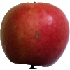

In [17]:
img=image.load_img('/content/drive/MyDrive/Dataset/TEST_SET/APPLES/151_100.jpg',target_size=(70,70))
img

In [18]:
x= image.img_to_array(img)

In [19]:
x = np.expand_dims(x, axis=0)

In [20]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'